<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- titanic data (titanic_data.csv)
- competition data (competition.csv)

The tasks given to you will be performed on "competition.csv"

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [4]:
data = pd.read_csv('titanic_data 1.csv')
dftitanic = data.copy()

### Basic Structure

In [5]:
print('Titanic', dftitanic.shape)

Titanic (891, 12)


In [7]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#Write code here
dftitanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Completeness

In [10]:
dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

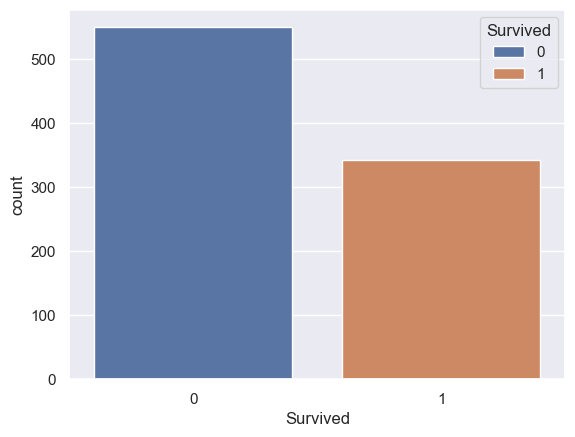

In [11]:
sns.countplot(x='Survived', hue='Survived', data=dftitanic);

**Gender & Survival**

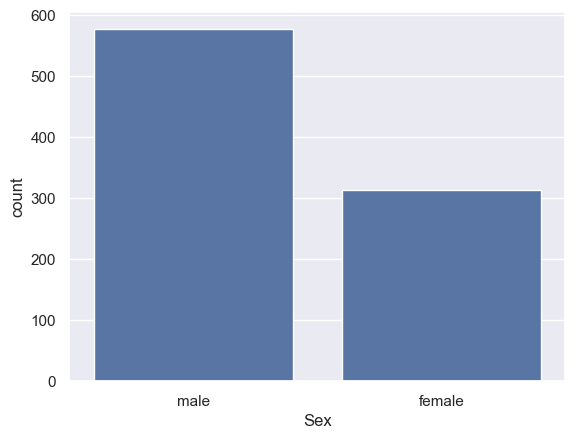

In [12]:
sns.countplot(x='Sex', data=dftitanic);

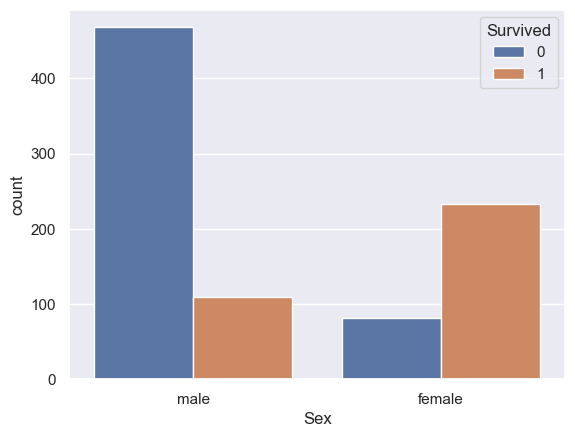

In [13]:
sns.countplot(x='Sex', hue='Survived', data=dftitanic);

### Passenger Survival Class

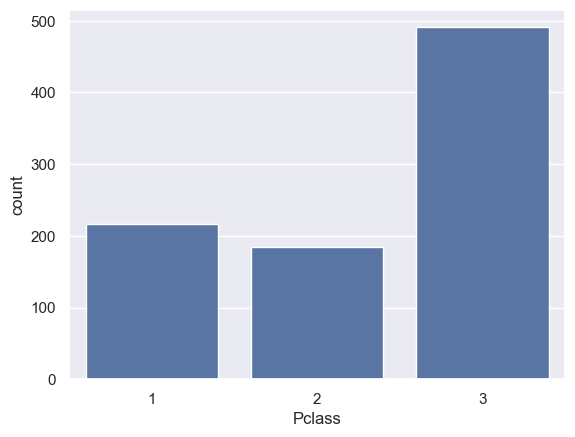

In [14]:
sns.countplot(x='Pclass', data=dftitanic);

**Task 8:**
Make a count plot for 'pclass' using 'dfcomp'

**Passenger Class, Gender & Survival**

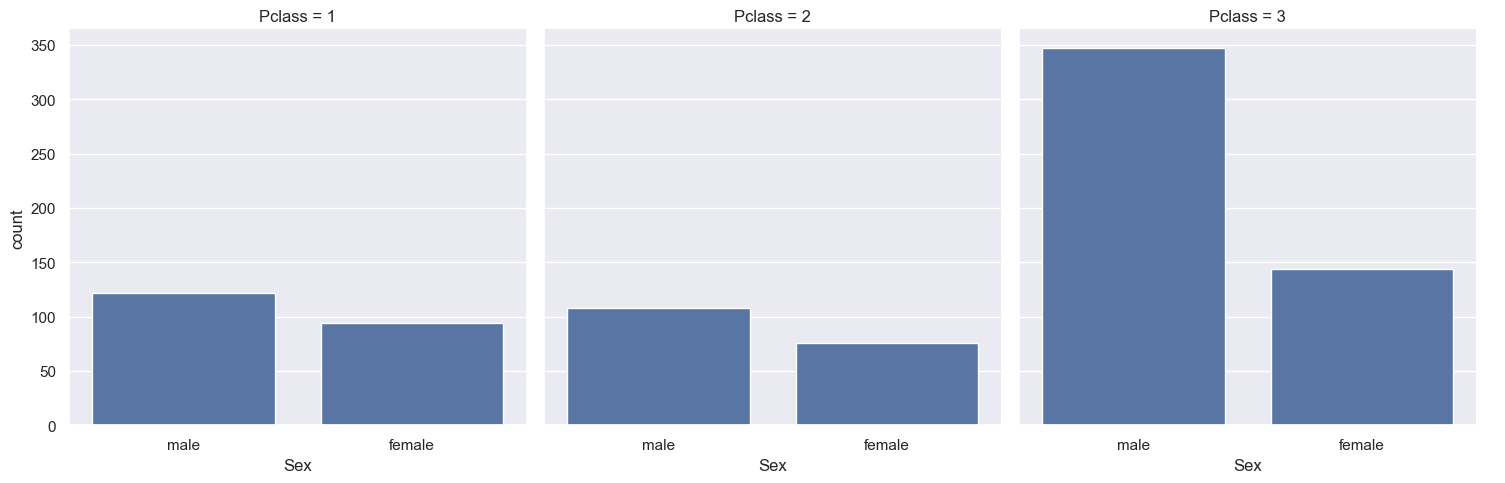

In [15]:
sns.catplot(x='Sex', col='Pclass', data=dftitanic, kind='count');

### 3.2 What's in the name?

In [16]:
dftitanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

This is called feature engineering where you derive additional columns as per your domain knowledge like creating 'Title in the following example.

In [144]:
import re
a='Braund, Mr.Owen Harris'
re.search(' ([A-Z][a-z]+)\.', a).group(1)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Omer\AppData\Local\Temp\ipykernel_6436\3134344279.py:3: SyntaxWarning: invalid escape sequence '\.'
  re.search(' ([A-Z][a-z]+)\.', a).group(1)


'Mr'

In [145]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dftitanic.head()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Omer\AppData\Local\Temp\ipykernel_6436\1486305004.py:1: SyntaxWarning: invalid escape sequence '\.'
  dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [146]:
dftitanic['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [149]:
dftitanic['Title'] = dftitanic['Title'].replace('Mlle', 'Miss')
dftitanic['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [150]:
# print(dftitanic['Title'])
dftitanic['Title'] = dftitanic['Title'].replace('Mme', 'Mrs')

print(dftitanic['Title'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


In [151]:

dftitanic.loc[(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'


In [152]:

dftitanic['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

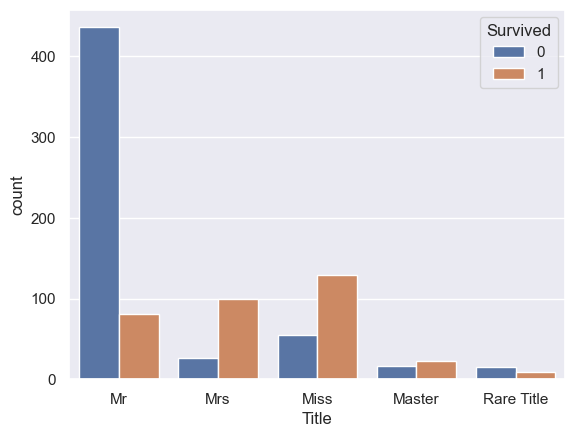

In [153]:
sns.countplot(data=dftitanic,x='Title', hue='Survived');

### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [159]:
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch'] + 1
# dftitanic

**Task 13:**
Show the countplot on column **'Fsize'** and check how many people are survived and died.

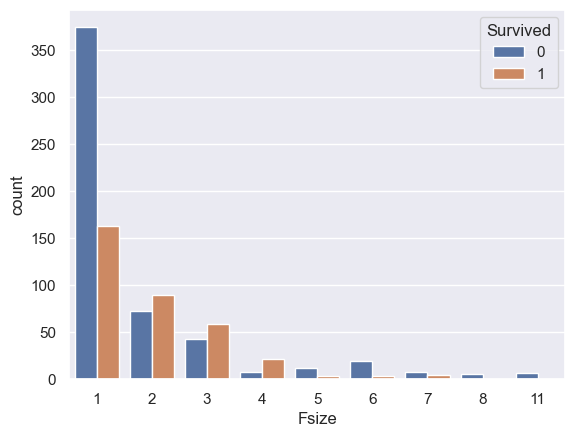

In [160]:
# Write the code here

sns.countplot(data=dftitanic,x= 'Fsize', hue='Survived');


**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [161]:
dftitanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [162]:

dftitanic['Ticket'].value_counts().head()


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: count, dtype: int64

**reset_index()** is a method to reset index of a Data Frame. **reset_index()** method sets a list of integer ranging from 0 to length of data as index.

In [163]:

dftitanic['Ticket'].value_counts().reset_index().head()


,Ticket,count
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [164]:

temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize')
temp


,Ticket,Tsize
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


In [165]:

dftitanic = dftitanic.merge(temp, on='Ticket', how='inner')
dftitanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


**Task 14:**
Show the countplot on column **'Tsize'** and check how many people are survived and died.

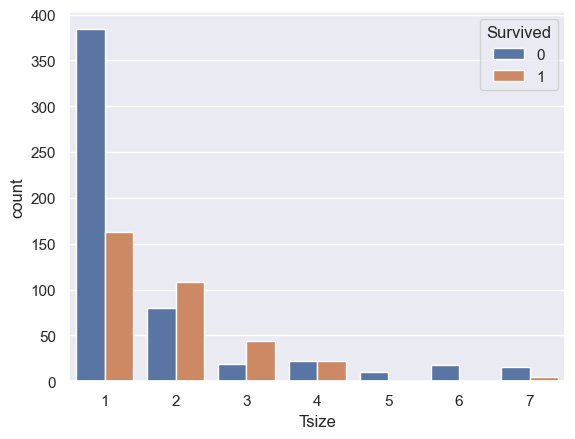

In [166]:
#write code here

sns.countplot(data=dftitanic,x= 'Tsize', hue='Survived');


**3.3.3 Consolidating family & friends**

In [167]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1


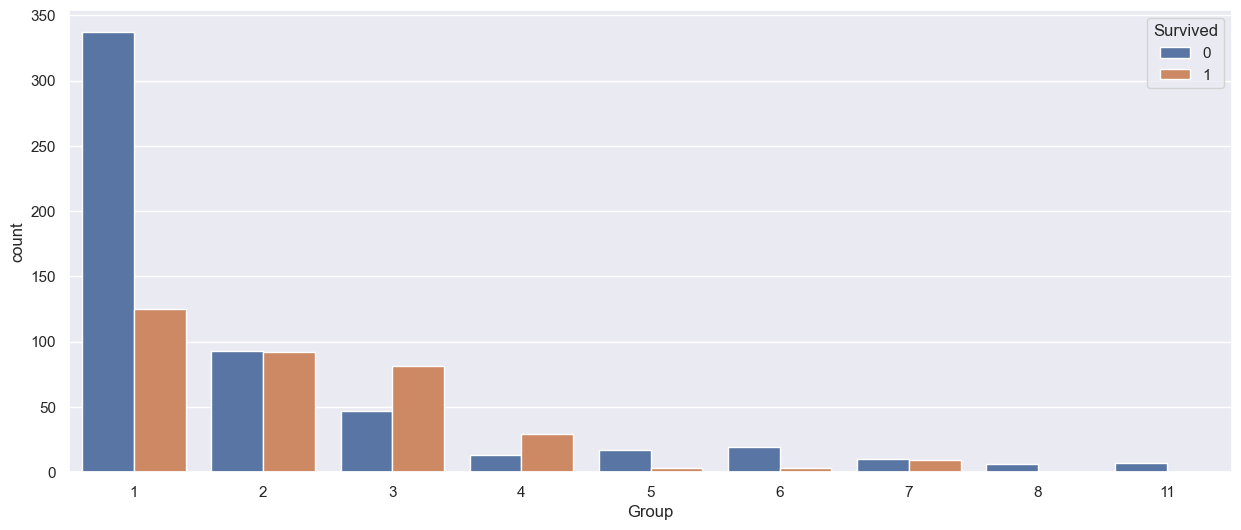

In [168]:

dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1)

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftitanic);


In [169]:

dftitanic['GrpSize'] = ''
dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==1, 'GrpSize'].replace('', 'solo')
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==2, 'GrpSize'].replace('', 'couple')
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] = dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'].replace('', 'group')
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = dftitanic.loc[dftitanic['Group']>4, 'GrpSize'].replace('', 'large group')
dftitanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,solo


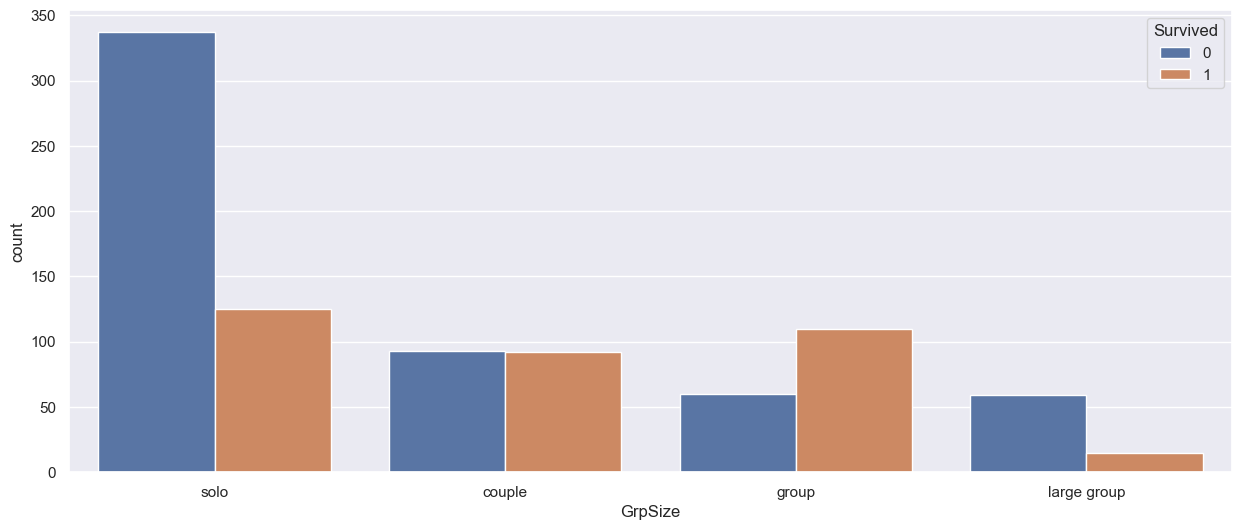

In [170]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

### 3.4 Effect of Fare

In [182]:
# Write code here

print('Total null values', dftitanic['Fare'].isnull().sum() )


Total null values 0


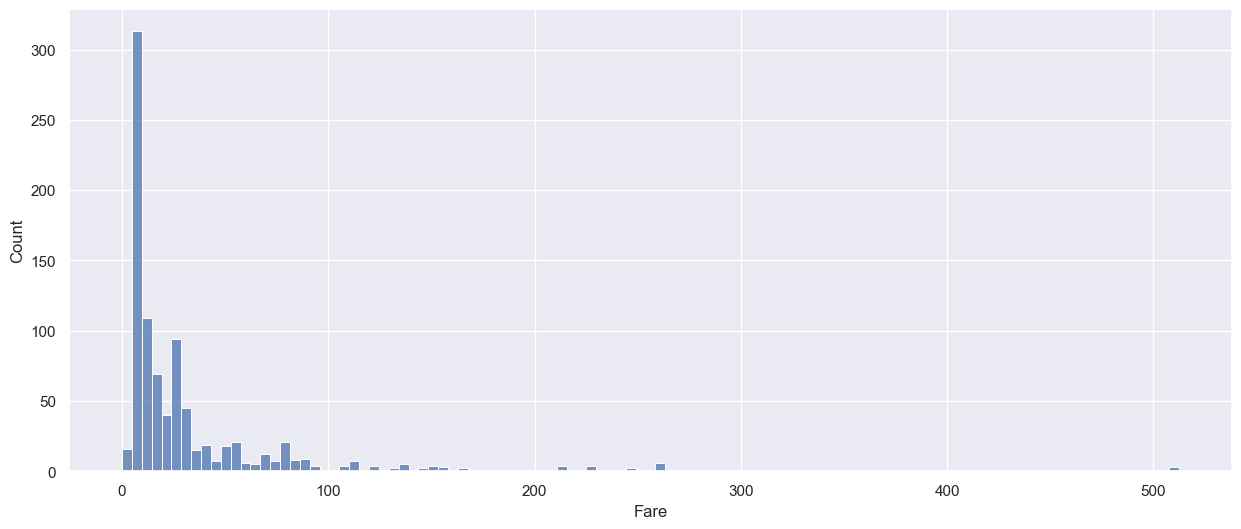

In [183]:
plt.subplots(figsize=(15,6))
sns.histplot(dftitanic['Fare']);


In [184]:

dftitanic[dftitanic['Fare'] < 0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


In [185]:
dftitanic[dftitanic['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1,1,1,solo
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1,1,1,solo
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1,1,1,solo


In [186]:
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()

In [187]:
dftitanic[dftitanic['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


Assigning categories to fare

In [188]:
dftitanic['FareCat'] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare']>10) & (dftitanic['Fare']<=25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare']>25) & (dftitanic['Fare']<=40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare']>40) & (dftitanic['Fare']<=70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']>70) & (dftitanic['Fare']<=100), 'FareCat'] = '70-100'
dftitanic.loc[dftitanic['Fare']>100, 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,8.0500,0-10


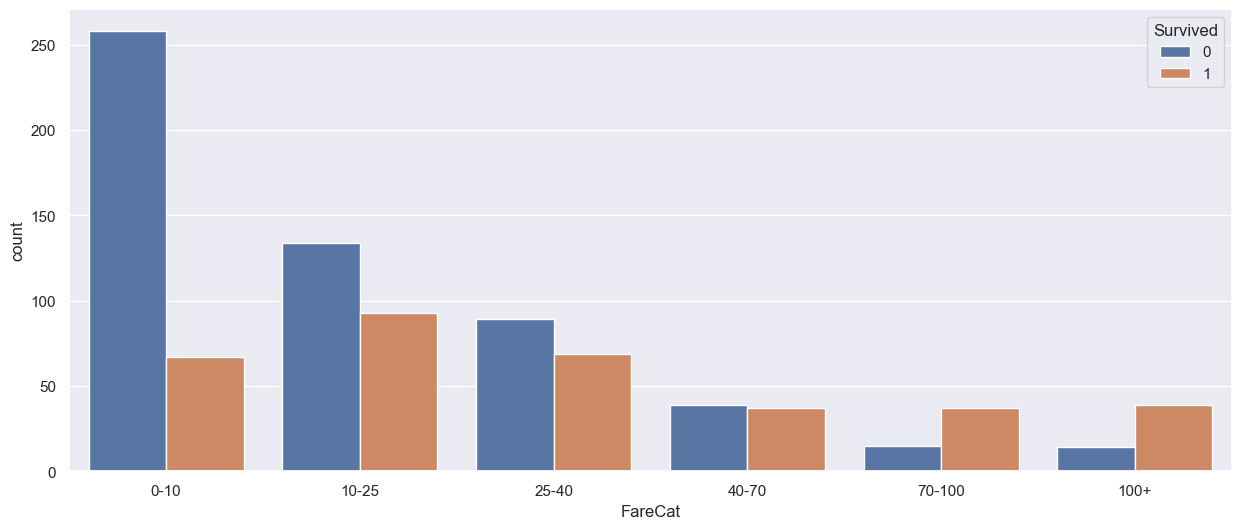

In [189]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);

In [192]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,solo,0-10


### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

In [193]:
dftitanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Fsize',
       'Tsize', 'Group', 'GrpSize', 'FareCat'],
      dtype='object')

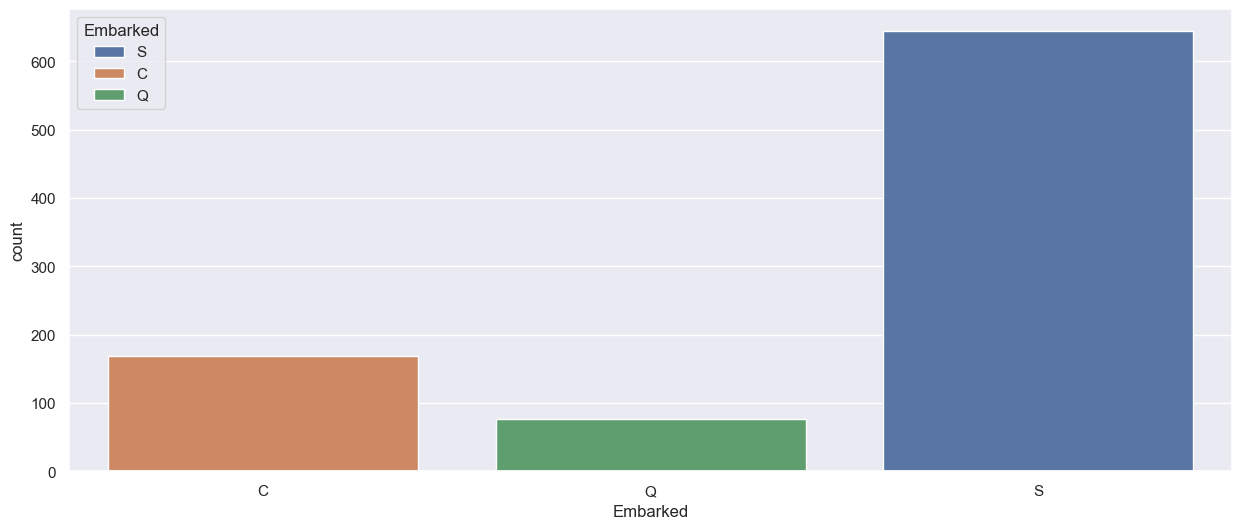

In [194]:
# Write the code here


plt.figure(figsize=(15,6));
sns.countplot(x='Embarked', order=['C', 'Q', 'S'], hue='Embarked', data=dftitanic);

***Engineered Features***

In [195]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100


## 4. Missing Values

### 4.1 Age

C:\Users\Omer\AppData\Local\Temp\ipykernel_6436\1782922720.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
C:\Users\Omer\AppData\Local\Temp\ipykernel_6436\1782922720.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");


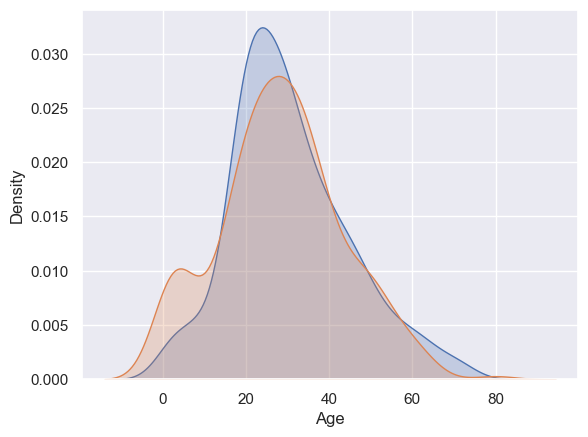

In [197]:

sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");


In [198]:

temp = dftitanic[dftitanic['Age'].isnull() == False]


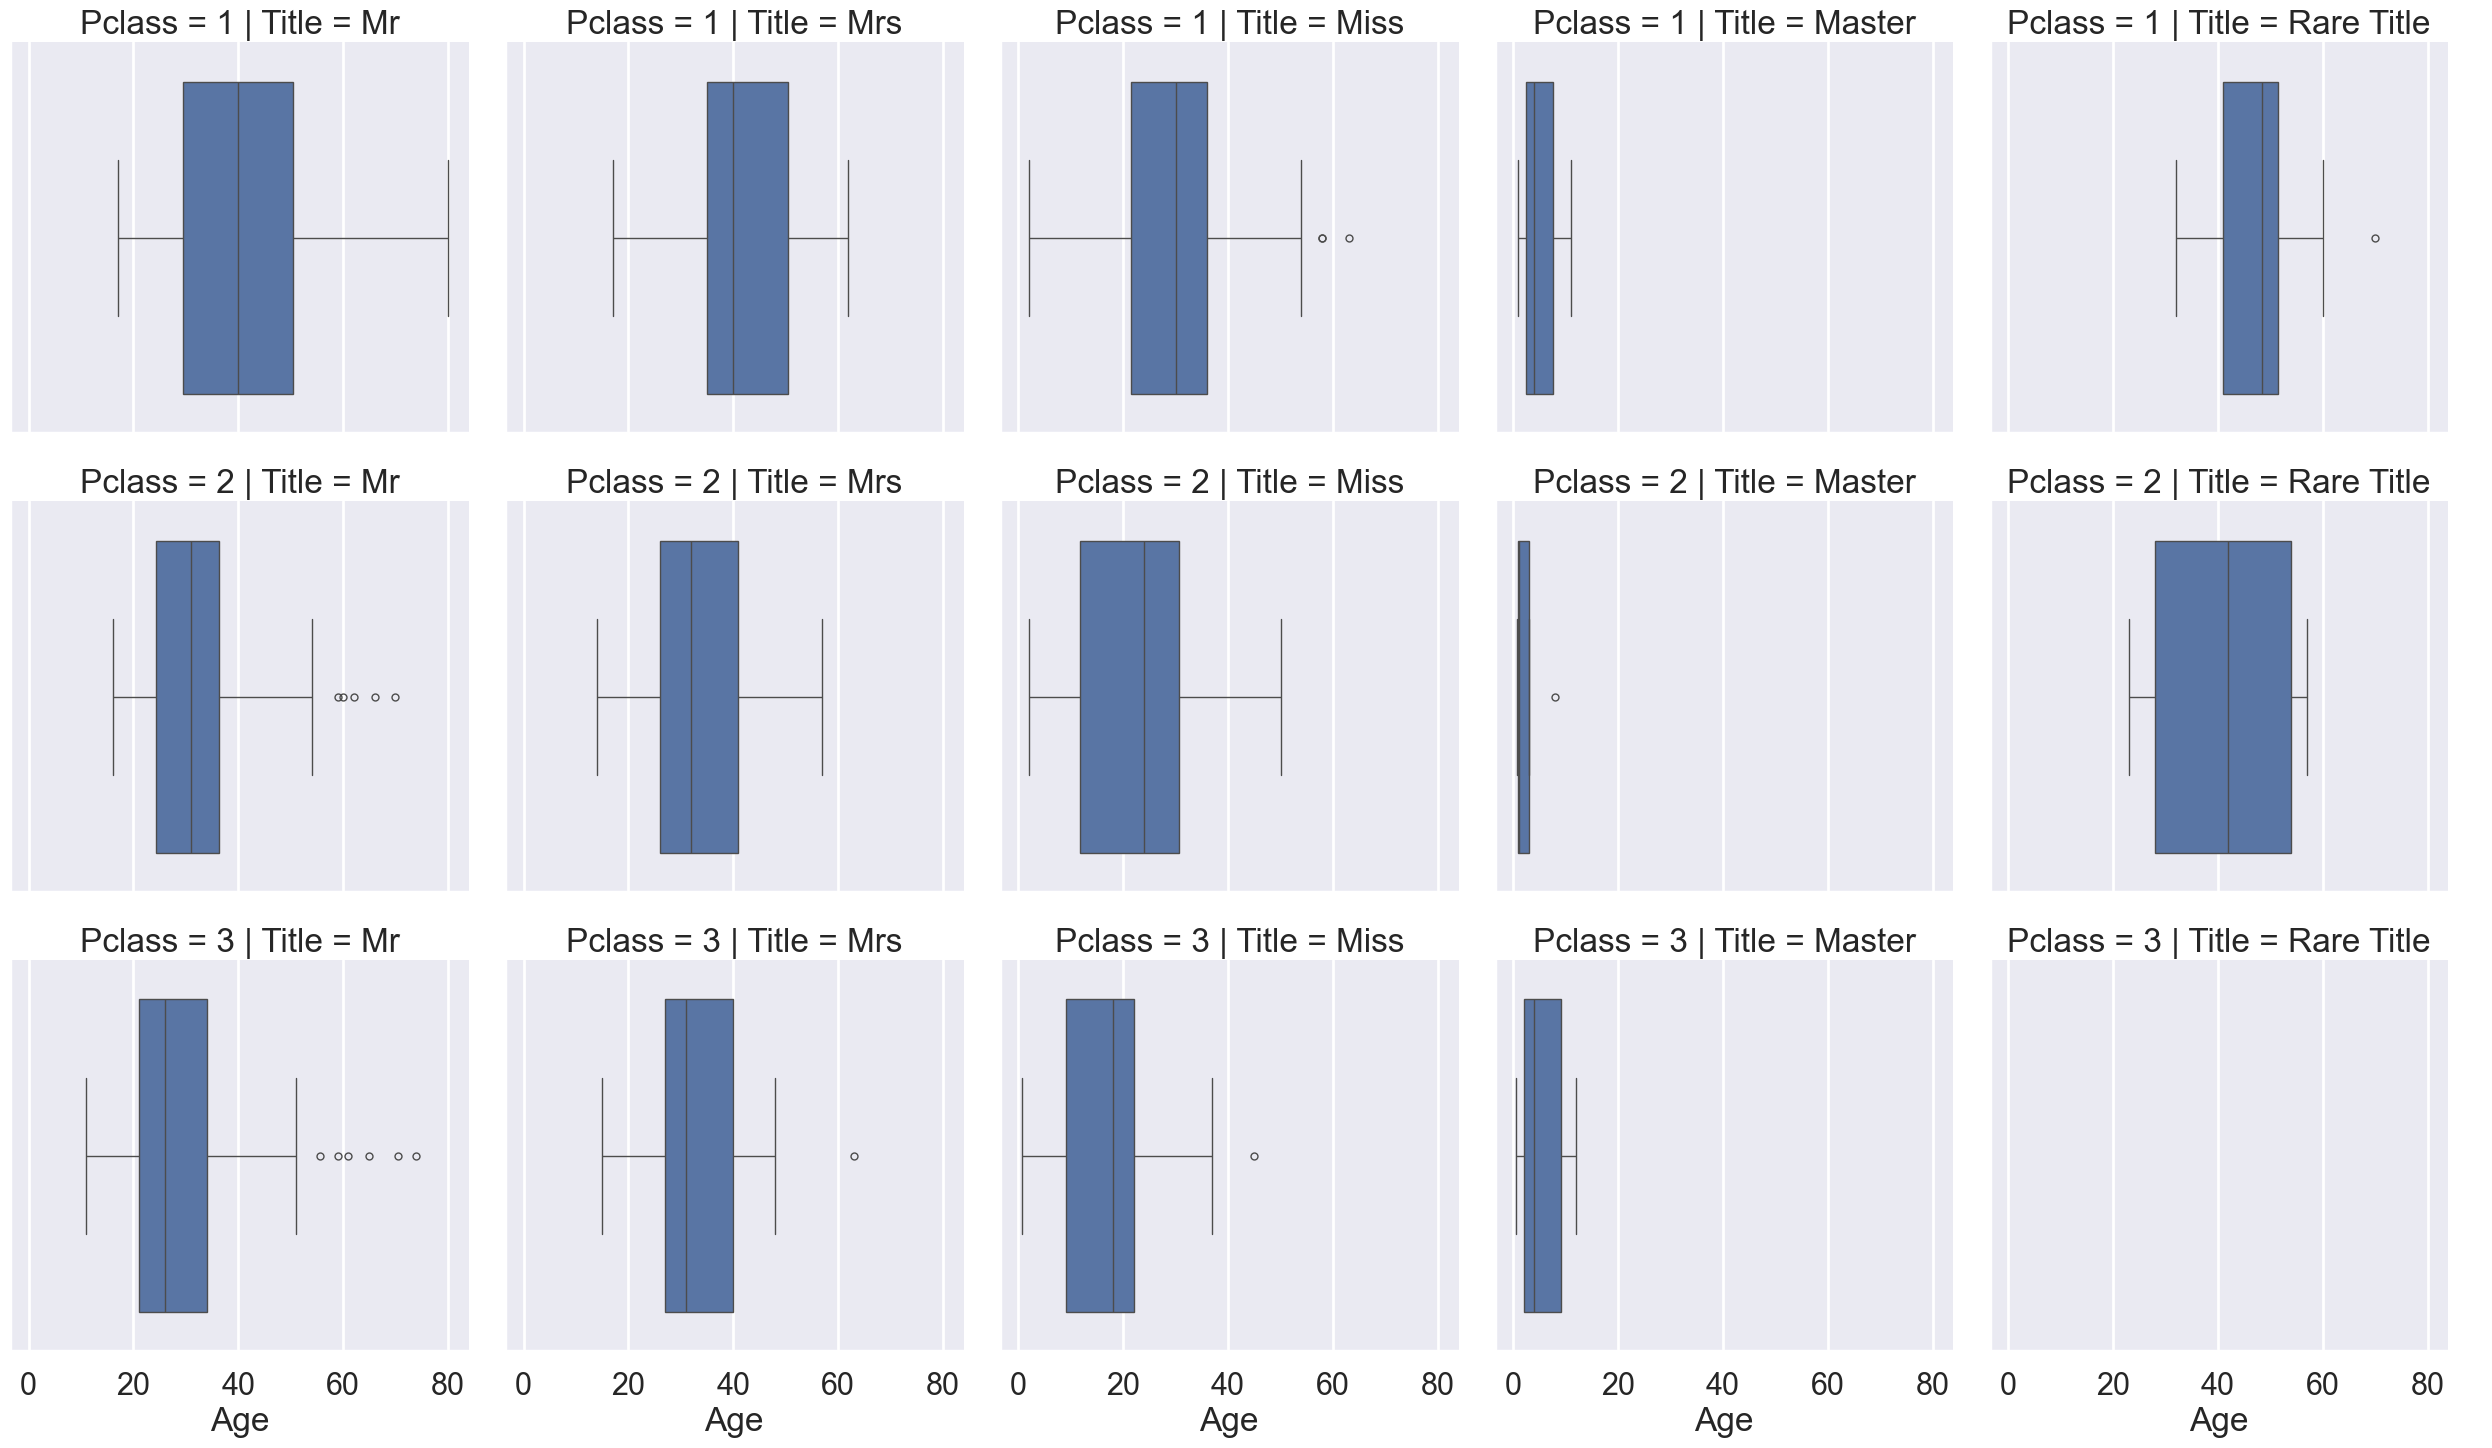

In [199]:
sns.set_context('poster')
sns.catplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [200]:
for t in dftitanic['Title'].unique():
    for p in dftitanic['Pclass'].unique():
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()

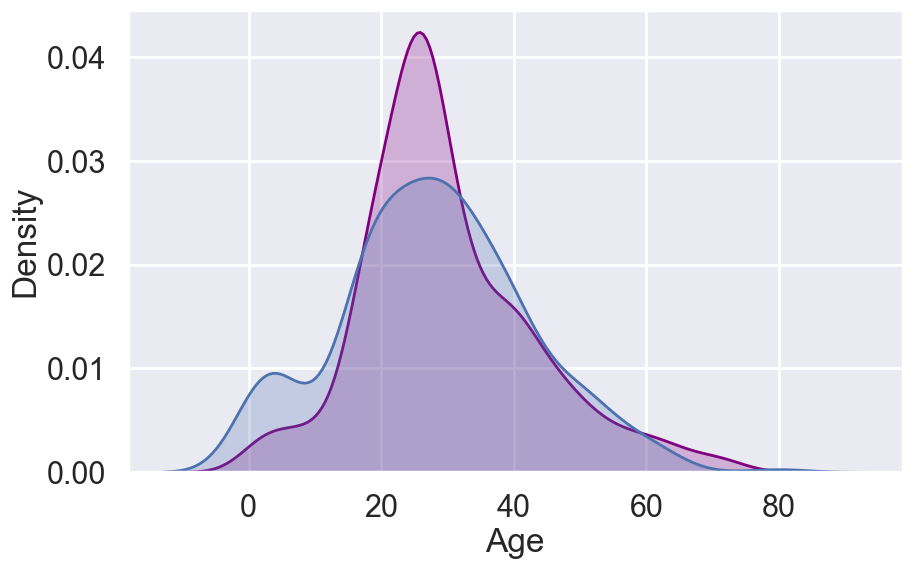

In [201]:
plt.subplots(figsize=(10,6))
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], fill=True,label='Not Survived', color='purple');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], fill=True,label='Survived');

In [202]:
#Write code here

dftitanic['Age'].isnull().sum()


0

Creating Age categories

In [203]:
dftitanic['AgeCat']=''
dftitanic.loc[ dftitanic['Age'] <= 16, 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[ dftitanic['Age'] > 64, 'AgeCat']= '64+'

**Task 22:**
Replace missing Age & Fair values in **'dfcomp'**

In [204]:
DfComp.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,GroupSize,Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,1,1,1,solo


### 4.2 Embarkment and null values

In [220]:
dftitanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Title,GrpSize,FareCat,AgeCat
count,891,891,891,204,889,891,891,891,891
unique,891,2,681,147,3,5,4,6,5
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Mr,solo,0-10,16-32
freq,1,577,7,4,644,517,462,325,490


In [221]:

dftitanic['Embarked'].isnull().sum()


2

In [222]:

dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'


### 4.3 Dropping Cabin

Defining the cabin type

In [224]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

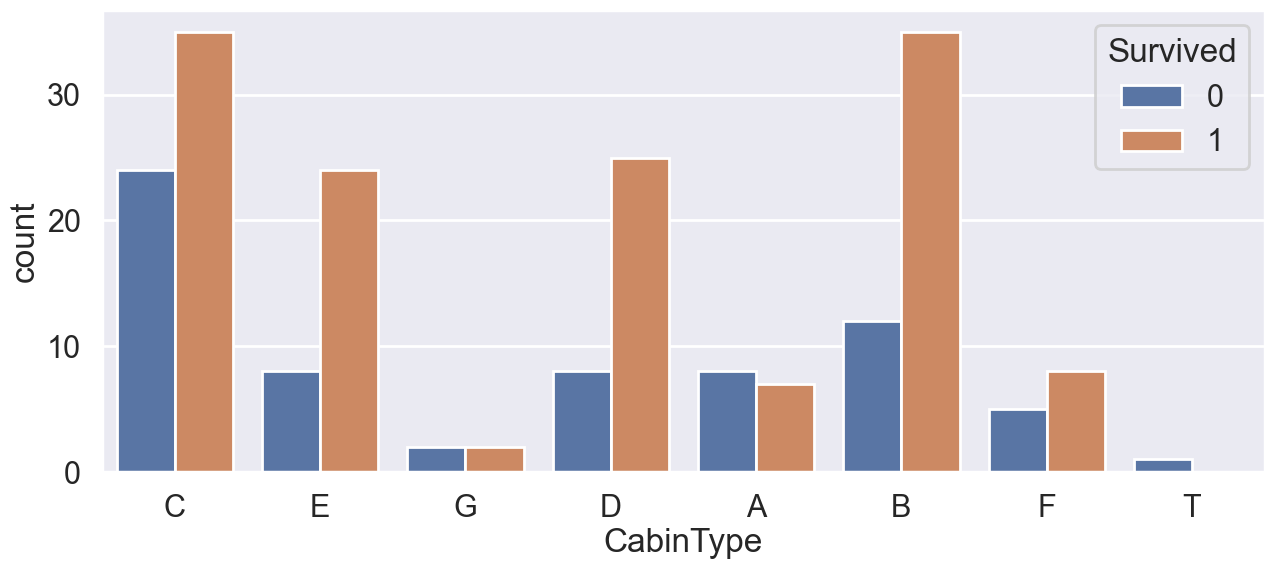

In [225]:

plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);


Dropping Cabin

In [226]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

CabinType  Pclass
A          1         15
B          1         47
C          1         59
D          1         29
           2          4
E          1         25
           2          4
           3          3
F          2          8
           3          5
G          3          4
T          1          1
Name: Pclass, dtype: int64

In [227]:
dftitanic.drop('Cabin',axis=1,inplace=True)

In [229]:
#Write the code here
dftitanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Fsize            0
Tsize            0
Group            0
GrpSize          0
FareCat          0
AgeCat           0
CabinType      687
dtype: int64

## 5. Feature Selection

In [231]:
sns.set_context('poster')

In [232]:
dftitanic['Sex'] = dftitanic['Sex'].map({'male': 0, 'female': 1})

In [233]:
dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
Fsize            int64
Tsize            int64
Group            int64
GrpSize         object
FareCat         object
AgeCat          object
CabinType       object
dtype: object

<Axes: >

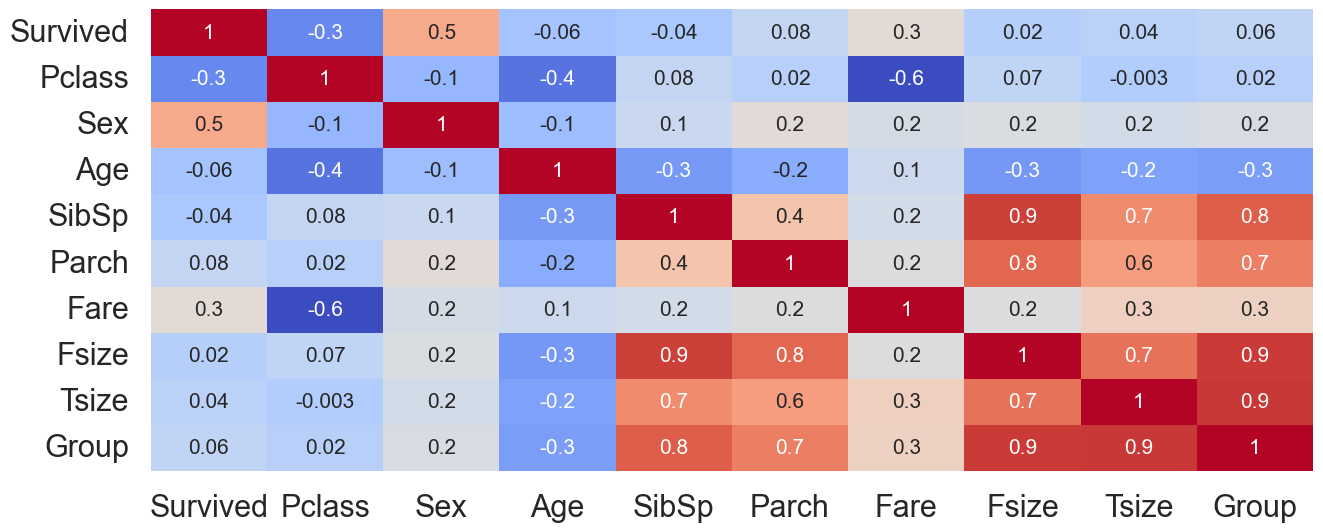

In [234]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = dftitanic.drop( ['PassengerId', 'Name', 'Ticket', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat', 'CabinType'  ] ,axis=1).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', cbar=False, annot_kws={"size": 15}, fmt='.1g')


The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'


In [235]:

drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']


Selecting final features

In [236]:
dftitanic.drop(drop_features,axis=1,inplace=True)